# Data Cleaning, Wrangling and  Preparation  
**Correcting errors, inconsistencies, and inaccuracies within a dataset.**

Batting

1. player1 - Virat Kohli
2. player2 - Rohit Sharma
3. player3 - David Warner

In [73]:
# Virat Kohli data

# Got this data on excel sheet, by get data->From file

import pandas as pd

# Create dataframe
player1 = pd.read_csv('Data player virat.csv', header=None)

# drop the first 2 rows
player1 = player1.iloc[2:]
# Make the first row as header
header_row = player1.iloc[0]

# Exclude the first row that was used as header
player1 = player1.iloc[1:]
player1.columns = header_row

player1

2,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date
3,28,28,19,147.36,5,0,v South Africa,Durban,9-Jan-11
4,14,14,12,116.66,2,0,v West Indies,Port of Spain,4-Jun-11
5,4,4,5,80,0,0,v England,Manchester,31-Aug-11
6,15,15,16,93.75,3,0,v England,Eden Gardens,29-Oct-11
7,22,22,21,104.76,0,1,v Australia,Sydney,1-Feb-12
...,...,...,...,...,...,...,...,...,...
111,62*,62,44,140.9,3,2,v Netherlands,Sydney,10/27/2022
112,12,12,11,109.09,2,0,v South Africa,Perth,10/30/2022
113,64*,64,44,145.45,8,1,v Bangladesh,Adelaide,11/2/2022
114,26,26,25,104,2,0,v Zimbabwe,Melbourne,11/6/2022


Use 'Tabula' library to extract tables from the PDF and directly have a structured table



In [37]:
!pip install tabula-py

Function to get the PDF data and extract the tables into an excel sheet

In [74]:
import pandas as pd
import tabula

# Function to extract data and save it to Excel
def extract_and_save_data(file_path, output_file):
    # Read all pages of the PDF file and extract tables into a list of DataFrames
    tables = []
    all_pages = tabula.read_pdf(file_path, pages='all', multiple_tables=True)
    tables.extend(all_pages)

    # Concatenate all tables into a single DataFrame if needed
    combined_df = pd.concat(tables)

    # Export the combined DataFrame to Excel
    combined_df.to_excel(output_file, index=False)

# Path to Rohit Sharma's PDF file
rohit_file_path = 'Rohit.pdf'
rohit_output_file = 'rohit_data.xlsx'
extract_and_save_data(rohit_file_path, rohit_output_file)

# Path to David Warner's PDF file
warner_file_path = 'Warner.pdf'
warner_output_file = 'warner_data.xlsx'
extract_and_save_data(warner_file_path, warner_output_file)


1.   Function to change the xlsx data to a comma separated file for easy usage
2.   Get the dataframes in separate variables




In [75]:
# Lets change the xlsx data to a csv file for easy usage
import pandas as pd

xlsx_data = 'warner_data.xlsx'

def xlsx_to_csv(data, output):
  df = pd.read_excel(data)
  df.to_csv(output, index=False)
  return df.iloc[:,15:].iloc[5:,:]

warner_xlsx = 'warner_data.xlsx'
rohit_xlsx = 'rohit_data.xlsx'

player2 = xlsx_to_csv(rohit_xlsx, 'rohit_csv')
player3 = xlsx_to_csv(warner_xlsx, 'warner_csv')

In [76]:
player2

,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date
5,DNB,-,-,-,-,-,v England,Durban,19 Sep 2007
6,50*,50,40,125.00,7,2,v South Africa,Durban,20 Sep 2007
7,8*,8,5,160.00,0,1,v Australia,Durban,22 Sep 2007
8,30*,30,16,187.50,2,1,v Pakistan,Johannesburg,24 Sep 2007
9,DNB,-,-,-,-,-,v Australia,Brabourne,20 Oct 2007
...,...,...,...,...,...,...,...,...,...
143,17,17,14,121.42,2,1,v Australia,Hyderabad,25 Sep 2022
144,0,0,2,0,0,0,v South Africa,Thiruvananthapuram,28 Sep 2022
145,43,43,37,116.21,7,1,v South Africa,Guwahati,2 Oct 2022
146,0,0,2,0,0,0,v South Africa,Indore,4 Oct 2022


In [77]:
player3

,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date
5,89,89.0,43.0,206.97,7.0,6.0,v South Africa,Melbourne,11 Jan 2009
6,7,7.0,12.0,58.33,0.0,0.0,v South Africa,Brisbane,13 Jan 2009
7,23,23.0,15.0,153.33,4.0,0.0,v New Zealand,Sydney,15 Feb 2009
8,38,38.0,29.0,131.03,4.0,1.0,v South Africa,Johannesburg,27 Mar 2009
9,20,20.0,15.0,133.33,2.0,1.0,v South Africa,Centurion,29 Mar 2009
...,...,...,...,...,...,...,...,...,...
98,73,73.0,44.0,165.90,8.0,2.0,v England,Perth,9 Oct 2022
99,4,4.0,11.0,36.36,0.0,0.0,v England,Canberra,12 Oct 2022
100,5,5.0,6.0,83.33,1.0,0.0,v New Zealand,Sydney,22 Oct 2022
101,11,11.0,10.0,110.00,0.0,0.0,v Sri Lanka,Perth,25 Oct 2022


For loop to convert/format date to datetime

In [78]:
# Convert dates to datetime
players = [player1, player2, player3]

for idx, df in enumerate(players):
    df['Start Date'] = pd.to_datetime(df['Start Date'])
    df = df[df['Bat1'] != 'DNB']
    df = df[df['Bat1'] != 'TDNB']
    df['Bat1'] = df['Bat1'].str.replace('*', '')

    # Reassign the modified DataFrame to the players list or specific player variable
    if idx == 0:
        player1 = df
    elif idx == 1:
        player2 = df
    elif idx == 2:
        player3 = df


<ipython-input-78-9037f4d462bc>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Bat1'] = df['Bat1'].str.replace('*', '')
<ipython-input-78-9037f4d462bc>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Bat1'] = df['Bat1'].str.replace('*', '')
<ipython-input-78-9037f4d462bc>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Bat1'] = df['Bat1'].str.replace('*', '')




---


Data preparation ended

1. Linear Regression is a fundamental machine learning algorithm used for regression tasks. It's particularly useful when you want to understand the relationship between a dependent variable ('Runs' in this case) and one or more independent variables ('BF', 'SR', '4s', '6s').
2. Mean Squared Error (MSE): It measures the average squared difference between the actual and predicted values. Lower MSE indicates better model performance.
It's a widely used metric to evaluate the performance of regression models.

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def perform_linear_regression(player_df):
    # Convert columns to numeric, coercing non-convertible values to NaN
    numeric_columns = ['BF', 'SR', '4s', '6s', 'Runs']
    player_df[numeric_columns] = player_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

    # Drop rows with null values after conversion
    player_df.dropna(subset=numeric_columns, inplace=True)

    features = ['BF', 'SR', '4s', '6s']
    X = player_df[features]
    y = player_df['Runs']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    return mse

# using 3 dataframes
players = [player1, player2, player3]
for idx, player in enumerate(players, start=1):
    mse = perform_linear_regression(player)
    print(f"Player {idx} - Mean Squared Error: {mse}")


Player 1 - Mean Squared Error: 16.63790336681337
Player 2 - Mean Squared Error: 8.21877950323119
Player 3 - Mean Squared Error: 12.888455713647696


1. Player 1 - Mean Squared Error: 16.64 - This suggests that the model's predictions for 'Runs' are, on average, off by approximately 16.64 units (squared).
Player 2 - Mean Squared Error: 8.22

2. A lower MSE (8.22) compared to Player 1 indicates that the predictions for Player 2's 'Runs' are closer to the actual values on average than Player 1.
Player 3 - Mean Squared Error: 12.89

3. This MSE value is between the MSEs of Player 1 and Player 2, suggesting that the model's predictions for Player 3's 'Runs' are less accurate than Player 2 but better than Player 1.

# CHECK - WIP

In [82]:
# Can be expanded and checked with the matches that happen before 2024 world cup

# New data for prediction (example)
new_data = pd.DataFrame({
    'BF': [60, 45],
    'SR': [120, 130],
    '4s': [6, 4],
    '6s': [2, 1]
})

# Use the trained model to predict runs for the new data
predicted_runs = model.predict(new_data)
print("Predicted Runs for new data:")
print(predicted_runs)


Predicted Runs for new data:
[76.23225458 53.80618015]


# CHECK - WIP

# RandomForestRegressor

1. Concept: RandomForestRegressor is an ensemble method that builds multiple decision trees and combines their predictions. It constructs each tree based on a random subset of features and averages the predictions across all trees.
2. Use Cases: Effective when dealing with complex relationships and interactions between features. Handles non-linearity and works well with high-dimensional data.

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def perform_random_forest_regression(player_df):
    # Convert columns to numeric, coercing non-convertible values to NaN
    numeric_columns = ['BF', 'SR', '4s', '6s', 'Runs']
    player_df[numeric_columns] = player_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

    # Drop rows with NaN values after conversion
    player_df.dropna(subset=numeric_columns, inplace=True)

    features = ['BF', 'SR', '4s', '6s']
    X = player_df[features]
    y = player_df['Runs']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    return mse


players = [player1, player2, player3]
for idx, player in enumerate(players, start=1):
    mse = perform_random_forest_regression(player)
    print(f"Player {idx} - Mean Squared Error: {mse}")


Player 1 - Mean Squared Error: 28.85933636363637
Player 2 - Mean Squared Error: 26.357633333333336
Player 3 - Mean Squared Error: 53.42883999999998


MSEs are showing larger error values, this may be because randomforestregressor works better on larger datasets

# ARIMA MODELS


1. Seasonal or Trended Data: ARIMA can capture both trend and seasonality in data, making it suitable for cases where historical 'Runs' for players might have observable trends or seasonal patterns.
2. p (AR parameter): Represents the autoregressive part, indicating the number of lag observations included in the model. Higher p values account for more past observations.
3. d (Integration parameter): Denotes the degree of differencing. It transforms the time series into a stationary series by differencing observations at a specific lag. Setting d=1 in 'order' suggests differencing the series once.
4. q (MA parameter): Represents the moving average part, indicating the size of the moving average window. Higher q values account for more lagged forecast errors in the prediction equation.

In [84]:
import numpy as np

int_columns = ['Bat1', 'Runs', 'BF', 'SR', '4s', '6s']

def safe_convert(value):
    try:
        return float(value)
    except (ValueError, TypeError):
        return np.nan  # Assign NaN for non-convertible values

# Assuming player1 and player2 are your DataFrames
for col in int_columns:
    player1[col] = player1[col].apply(safe_convert)
    player2[col] = player2[col].apply(safe_convert)
    player3[col] = player3[col].apply(safe_convert)


Player 1 - Forecasted Runs for next 5 dates:
106    49.680585
107    40.213620
108    42.716688
109    45.776103
110    42.365514
Name: predicted_mean, dtype: float64


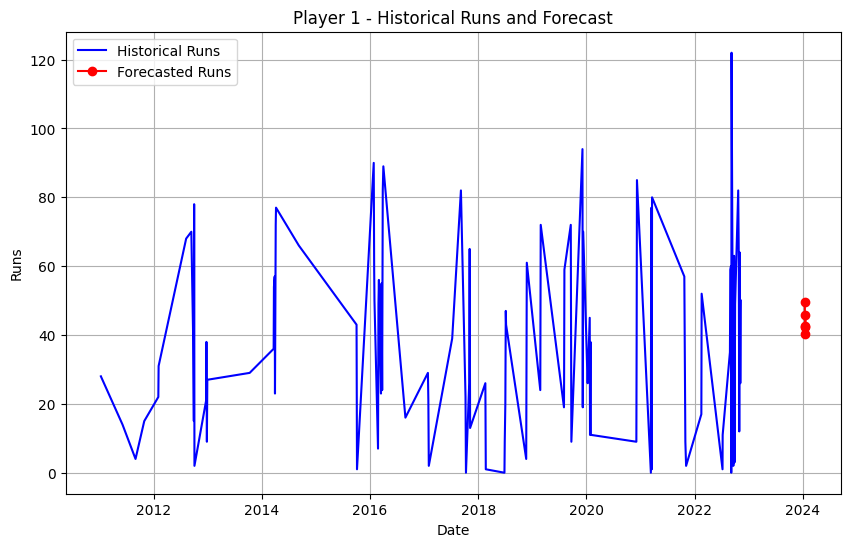

Player 2 - Forecasted Runs for next 5 dates:
134    16.652612
135    18.591075
136     9.871128
137    15.170428
138    11.202794
Name: predicted_mean, dtype: float64


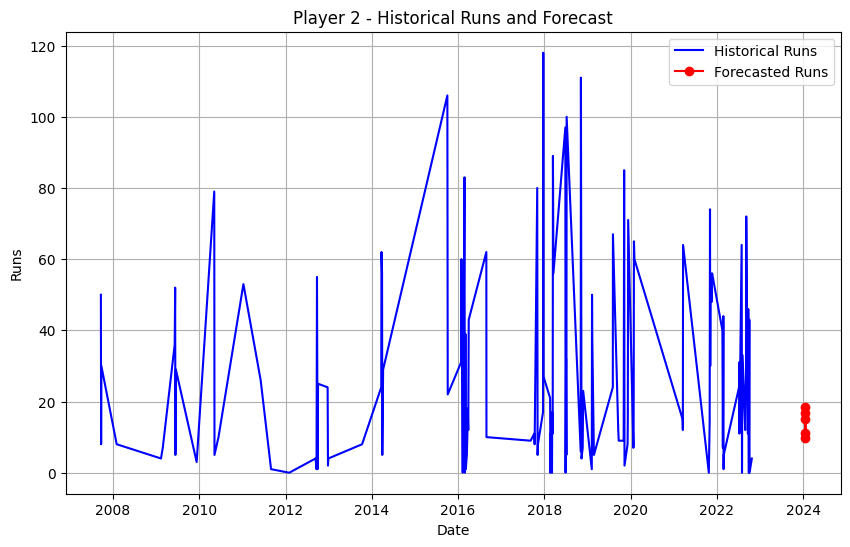

Player 3 - Forecasted Runs for next 5 dates:
98     27.948272
99     15.863538
100    10.132813
101    13.950740
102    12.315735
Name: predicted_mean, dtype: float64


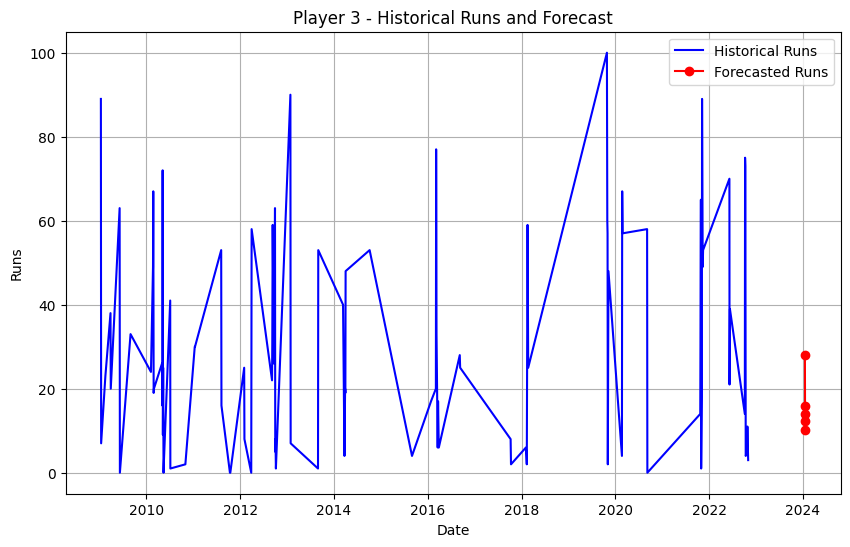

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")

players = [player1, player2, player3]

for idx, player in enumerate(players, start=1):
    player['Start Date'] = pd.to_datetime(player['Start Date'])

    # Sorting data by 'Start Date' for time series analysis
    player.sort_values(by='Start Date', inplace=True)

    # Create a time series using 'Start Date' as index and 'Runs' as values
    time_series = player.set_index('Start Date')['Runs']

    # Fit ARIMA model
    model = ARIMA(time_series, order=(5, 1, 0))
    model_fit = model.fit()

    # Forecast next 5 values
    forecast = model_fit.forecast(steps=5)

    print(f"Player {idx} - Forecasted Runs for next 5 dates:")
    print(forecast)

    # Extend the date index to include the 2024 World Cup period
    extended_dates = pd.date_range(start='2024-01-01', periods=20, freq='D')  # 20 days during the tournament

    # Forecasted values with the extended date index
    forecast_extended = pd.Series(forecast, index=extended_dates[-5:])  # Select the last 5 dates for the tournament

    # Plotting historical 'Runs' data and forecasted values including the World Cup period
    plt.figure(figsize=(10, 6))
    plt.plot(time_series, label='Historical Runs', color='blue')
    plt.plot(forecast_extended.index, forecast, label='Forecasted Runs', color='red', marker='o')  # Change values to forecast
    plt.title(f"Player {idx} - Historical Runs and Forecast")
    plt.xlabel('Date')
    plt.ylabel('Runs')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


player1['Opposition_Encoded'] = label_encoder.fit_transform(player1['Opposition'])
encoded_labels = label_encoder.classes_

# Map encoded labels to original categorical labels
label_map = {label: encoded for label, encoded in zip(player1['Opposition'], player1['Opposition_Encoded'])}

# Display original labels with their corresponding encoded values
print("Encoded Labels with Values:")
for label, encoded in label_map.items():
    print(f"{label}: {encoded}")


Encoded Labels with Values:
v South Africa: 10
v West Indies: 12
v England: 3
v Australia: 1
v Sri Lanka: 11
v New Zealand: 7
v Afghanistan: 0
v Pakistan: 8
v Bangladesh: 2
v Ireland: 5
v Scotland: 9
v Hong Kong: 4
v Netherlands: 6
v Zimbabwe: 13


In [ ]:
correlation_runs_BF = player1['Runs'].corr(player1['BF'])
correlation_runs_SR = player1['Runs'].corr(player1['SR'])


print('Correlation of Runs and Balls faced: {0}, Correlation of Runs and Strike rate: {1}'.format(round(correlation_runs_BF,2),round(correlation_runs_SR,2)))

Correlation of Runs and Balls faced: 0.95, Correlation of Runs and Strike rate: 0.64


Above correlations show good positive and high correlation

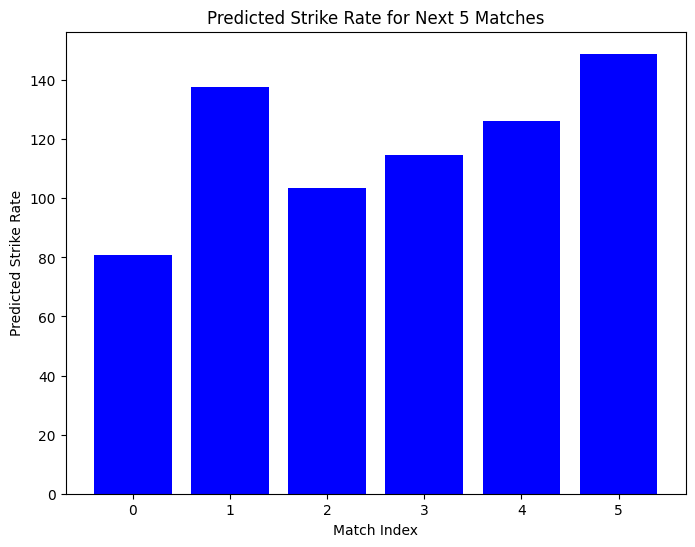

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Extract features (Runs) and target variable (SR)
X = player1[['Runs']]  # Features: 'Runs'
y = player1['SR']  # Target variable: Strike Rate

# Linear Regression model
model = LinearRegression()
model.fit(X, y)

# The following runs are an assumption as Linear regression needs the SR is dependent on Runs
future_runs = pd.DataFrame({'Runs': [0, 50, 20, 30, 40, 60]})
future_predictions = model.predict(future_runs)

# Plotting bar chart for predicted SR values for next 6 matches
plt.figure(figsize=(8, 6))
plt.bar(range(len(future_predictions)), future_predictions, color='blue')
plt.xlabel('Match Index')
plt.ylabel('Predicted Strike Rate')
plt.title('Predicted Strike Rate for Next 5 Matches')
plt.xticks(range(len(future_predictions)))  # Set x-axis ticks for 5 matches
plt.show()


In [ ]:
future_predictions

array([ 83.88053521, 146.09516074, 108.76638542, 121.20931053,
       133.65223563, 158.53808584])

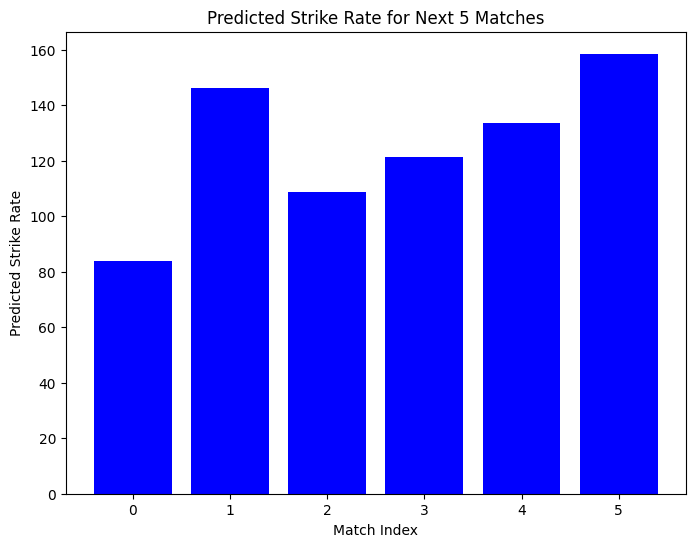

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assuming 'player_data' is your DataFrame containing historical 'Runs' and 'SR' columns
player2 = player2.dropna(subset=['SR'])

# Extract features (Runs) and target variable (SR)
X = player2[['Runs']]  # Features: 'Runs'
y = player2['SR']  # Target variable: Strike Rate

# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X, y)

# This is an assumption as Linear regression needs the SR is dependent on Runs
future_runs = pd.DataFrame({'Runs': [0, 50, 20, 30, 40, 60]})
future_predictions = linear_model.predict(future_runs)

# Plotting bar chart for predicted SR values for next 6 matches
plt.figure(figsize=(8, 6))
plt.bar(range(len(future_predictions)), future_predictions, color='blue')
plt.xlabel('Match Index')
plt.ylabel('Predicted Strike Rate')
plt.title('Predicted Strike Rate for Next 5 Matches')
plt.xticks(range(len(future_predictions)))  # Set x-axis ticks for 5 matches
plt.show()


Insert Data from a PDF, extract the tables from the PDF through Tabula library

In [ ]:
pip install tabula-py